In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv('TG_T_CashValues_Rel.csv')

In [3]:
print('Data Info:')
print(data.info())

print('\nData Description:')
print(data.describe())

# Display first few rows
print('\nFirst 5 Rows:')
print(data.head())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  5270 non-null   object 
 1   Age     5270 non-null   int64  
 2   Dur     5270 non-null   int64  
 3   PPV     5270 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 144.2+ KB
None

Data Description:
               Age          Dur          PPV
count  5270.000000  5270.000000  5270.000000
mean     31.294118    22.882353    14.858158
std      18.671548    13.793388     7.025862
min       0.000000     1.000000     1.000000
25%      16.000000    11.000000     9.374980
50%      30.000000    22.000000    15.703883
75%      45.000000    34.000000    20.953996
max      80.000000    50.000000    26.024118

First 5 Rows:
  Gender  Age  Dur        PPV
0   Male    0   20  15.198437
1   Male    0   21  15.741015
2   Male    0   22  16.267189
3   Male    0   23  16.777448
4  

In [5]:
# Step 2: Data Cleaning and Preparation
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Gender    0
Age       0
Dur       0
PPV       0
dtype: int64


In [6]:
# Encode categorical features (e.g., Gender)
data['Gender'] = data['Gender'].astype('category').cat.codes

In [7]:
# Define features and target
X = data[['Gender', 'Age', 'Dur']]
y = data['PPV']

In [8]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
import micropip
await micropip.install("seaborn")
import seaborn as sns
print(sns.__version__)

0.13.2


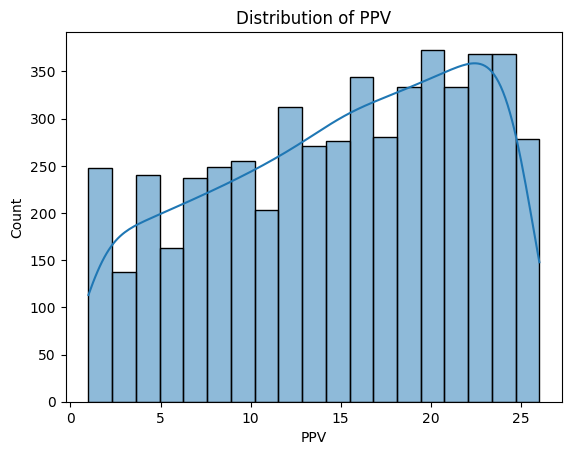

In [10]:
# Step 3: Exploratory Data Analysis (EDA)
# Visualize target variable distribution
sns.histplot(y, kde=True)
plt.title('Distribution of PPV')
plt.show()

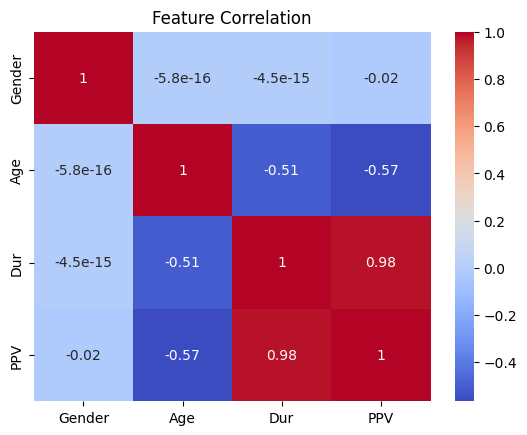

In [11]:
# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [3, 4, 5, 6, 7],  # قيم للعمق
    'learning_rate': [0.01, 0.1, 0.2],  # قيم لمعدل التعلم
    'n_estimators': [100, 200, 300]  # قيم لعدد الأشجار
}
xgb_model = XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# طباعة أفضل القيم التي تم اختيارها
print(f"BEST ONE: {grid_search.best_params_}")

BEST ONE: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}


y_pred=: [23.742374 19.10794  19.296957 ... 11.544289  8.37919  21.002626]


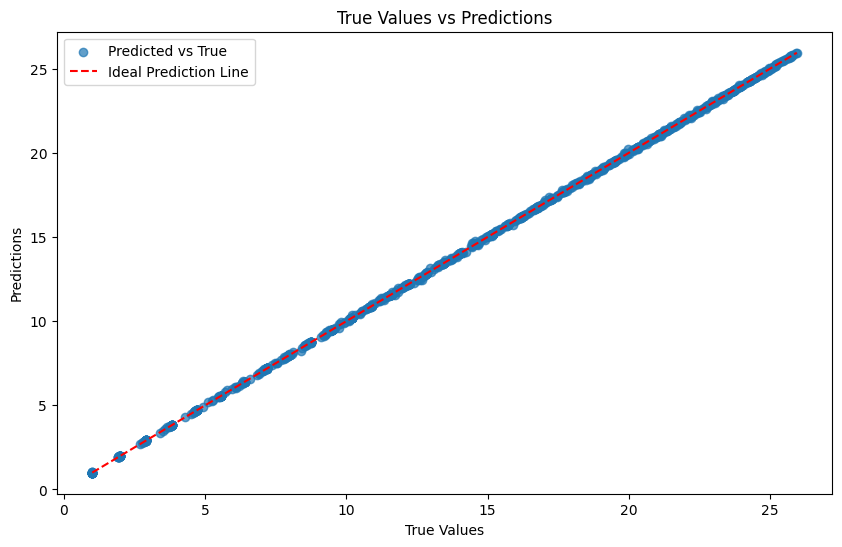

RMSE: 0.03944603926893261
MAE: 0.021541090237710878
R^2 (Accuracy): 0.9999669661654411


In [31]:
# Step 4: Model Building
# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.2, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
print(f"y_pred=: {y_pred}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs True')  # Plot predicted vs true values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction Line')  # Ideal line
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.legend()
plt.show()


# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"(Accuracy): {r2}")

In [30]:
# Step 5: Deployment (Save Model)
# Save the trained model
import joblib
joblib.dump(xgb_model, 'xgboost_model.pkl')


['xgboost_model.pkl']